<a href="https://colab.research.google.com/github/daniellekarlas/MLSENAC_Danielle/blob/main/Aula13modelo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 


In [2]:
(train_images, train_labels), (test_images, test_labels)=datasets.cifar10.load_data()

#normalização de pixels entre 0 e 1
train_images, test_images=train_images/255.0, test_images/255.0

170498071/170498071 [==============================] - 2s 0us/step


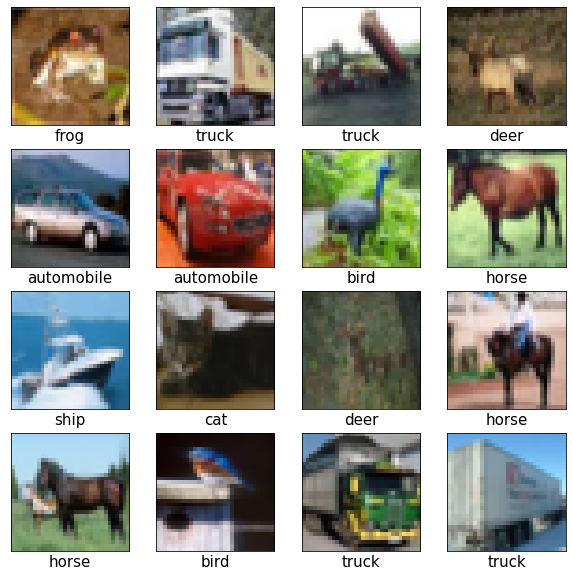

In [3]:
#visualizando uma amostra de dados
class_names=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10,10))
for i in range (16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)

  plt.xlabel(class_names[train_labels[i][0]], fontsize=15)
  plt.show

In [4]:
model=models.Sequential(name="CNN-CIFAR10")
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

model.summary()

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              

In [20]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

history=model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.1501 - accuracy: 0.5960 - val_loss: 1.0641 - val_accuracy: 0.6275
Epoch 2/10
1563/1563 [==============================] - 96s 62ms/step - loss: 1.0141 - accuracy: 0.6453 - val_loss: 1.0066 - val_accuracy: 0.6397
Epoch 3/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.9259 - accuracy: 0.6761 - val_loss: 0.9568 - val_accuracy: 0.6660
Epoch 4/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8574 - accuracy: 0.7013 - val_loss: 0.9472 - val_accuracy: 0.6788
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8006 - accuracy: 0.7189 - val_loss: 0.9354 - val_accuracy: 0.6758
Epoch 6/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7551 - accuracy: 0.7357 - val_loss: 0.8674 - val_accuracy: 0.7021
Epoch 7/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7112 - accuracy: 0.7494 - val_loss: 0.8847 -

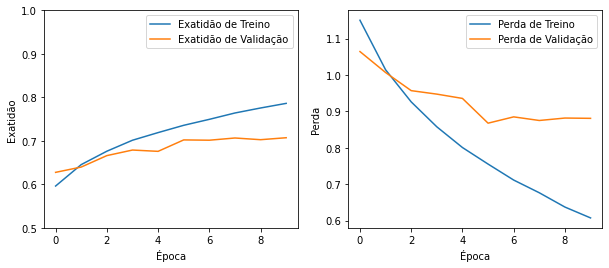

In [22]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Exatidão de Treino")
plt.plot(history.history["val_accuracy"], label="Exatidão de Validação")
plt.xlabel("Época")
plt.ylabel("Exatidão")
plt.ylim([0.5,1])
plt.legend(loc="upper right")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Perda de Treino")
plt.plot(history.history["val_loss"], label="Perda de Validação")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.legend(loc="upper right")

plt.show()

In [23]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 [==============================] - 5s 17ms/step


In [24]:
import numpy as np

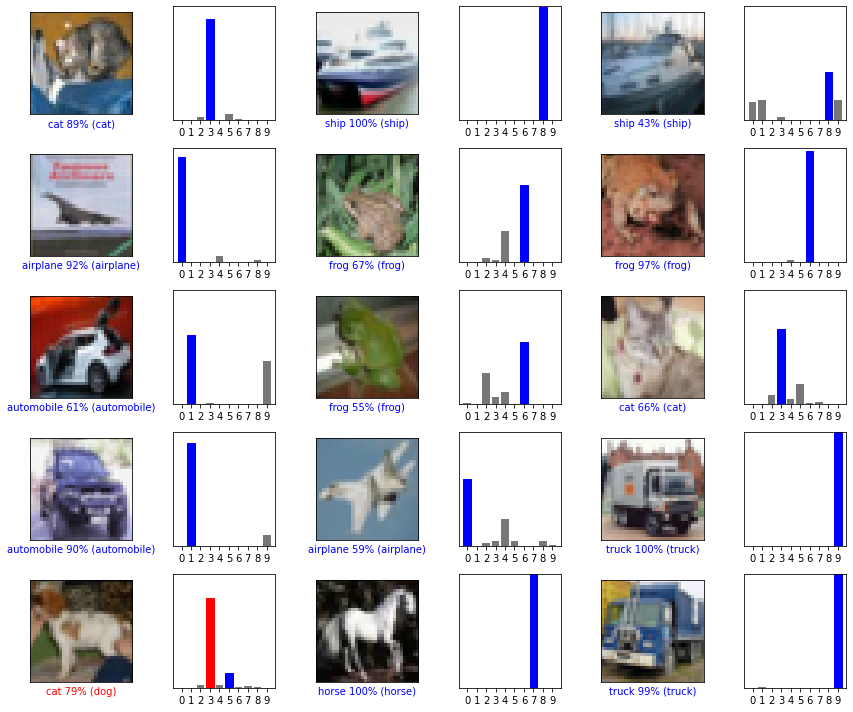

In [25]:
#previsões corretas em azul e erradas em vermelho
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()